# Titanic Data Investigation

## Main Question: What affected passengers' survival rate?

Using the Titanic data, I would like to investigate what sort of people were likely to survive through this incident. Breaking down the main question, "what affected passengers' survival rate?", into three more specific questions; "which gender had higher survival opportinity?", "was there any correlation between age and survival rate?" and "was there any correlation between fare and survival rate?", I would like to answer them one by one. 

## Table of Contents
###   - 0. Data Wrangling
###   - 1. Question 1
###   - 2. Question 2
###   - 3. Question 3
###   - 4. Conclusion

## 0. Data Wrangling

Before starting the data analysis, I would go through following three steps as a preparation.
- identify the missing values
- change the data type
- transform the given data into data frame

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodecsv as csv
from scipy import stats
import seaborn as sns

In [4]:
# Load titanic data from csv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = csv.DictReader(f)
        return list(reader)

titanic = read_csv('P3Project_Datasets/titanic-data.csv')

In [5]:
# Identify the missing values
pd.isnull(titanic).any()

False

In [6]:
# If i is empty, return none. else return an int
def parse_maybe_int(i):
#    if i == '':
#        return None
#        print("hi there is an ''.") # To test if the empty string loop in here
#    else:
        try:
            return int(i)
        except:
            None
            
def parse_maybe_float(i):
        try:
            return float(i)
        except:
            None


# Clean up the data types in the titanic table
for titanic2 in titanic:
    titanic2['Age'] = parse_maybe_int(titanic2['Age'])
    titanic2['Fare'] = parse_maybe_float(titanic2['Fare'])
    titanic2['Parch'] = parse_maybe_int(titanic2['Parch'])
    titanic2['Pclass'] = parse_maybe_int(titanic2['Pclass'])
    titanic2['SibSp'] = parse_maybe_int(titanic2['SibSp'])
    titanic2['Survived'] = parse_maybe_int(titanic2['Survived'])
    
titanic[0]

{u'Age': 22,
 u'Cabin': u'',
 u'Embarked': u'S',
 u'Fare': 7.25,
 u'Name': u'Braund, Mr. Owen Harris',
 u'Parch': 0,
 u'PassengerId': u'1',
 u'Pclass': 3,
 u'Sex': u'male',
 u'SibSp': 1,
 u'Survived': 0,
 u'Ticket': u'A/5 21171'}

In [7]:
# Convert to Data Frame
titanic_df = pd.DataFrame(titanic)

In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Age            689 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null object
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null int64
Ticket         891 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.6+ KB


In [9]:
titanic_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [10]:
survived = titanic_df['Survived']
age = titanic_df['Age']
fare = titanic_df['Fare']
parch = titanic_df['Parch']
pclass = titanic_df['Pclass']
sibsp = titanic_df['SibSp']

## 1. Question 1

First, I would like to answer this question; "which gender had higher survival opportinity?".

### To visualize the propotion of the genders between survived and non-servived groups in 2x2 contigency table

In [11]:
# draw 2x2 contigency table

pd.crosstab(titanic_df.Survived, titanic_df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [13]:
# calcurate odds ration and p value

oddsratio, pvalue = stats.fisher_exact([[81, 468], [233, 109]])
print 'Odds Ratio is', oddsratio
print 'pvalue is', pvalue, '(p value<.00001), very significant that a female has better chance to survive than a male.'

Odds Ratio is 0.0809673159459
pvalue is 6.46392156458e-60 (p value<.00001), very significant that a female has better chance to survive than a male.


### Answer 1. Female was likely to have better chance to survive than male

## 2. Question 2

At this section, I would like to answer to the second question, "was there any correlation between age and survival rate?".

In [61]:
# Check out the Median, 25%, 75% and Mean age / fare for both Survivals vs Non-survivals specifically

titanic_df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,689.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.847605,32.204208,0.381594,2.308642,0.523008,0.383838
std,14.317669,49.693429,0.806057,0.836071,1.102743,0.486592
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.910400,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,3.000000,8.000000,1.000000


In [64]:
# devide given data into two: those survived(x) and those non-survived(x1)
# describe the median, 25%, 75%, mean and etc. for each group

df_Survived = titanic_df[titanic_df.Survived==1]
x = df_Survived['Age'].dropna()
print('Stats for age for survivals')
print(x.describe())
print('\n')

df_xSurvived = titanic_df[titanic_df.Survived==0]
x1 = df_xSurvived['Age'].dropna()
print('Stats for age for non-survivals')
print(x1.describe())

Stats for age for survivals
count    282.000000
mean      29.014184
std       14.505115
min        1.000000
25%       19.000000
50%       28.500000
75%       37.750000
max       80.000000
Name: Age, dtype: float64


Stats for age for non-survivals
count    407.000000
mean      30.425061
std       14.175489
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64


(array([  8.,   5.,   7.,   4.,   2.,   1.,   2.,   2.,   0.,   1.,   1.,
          2.,   3.,   4.,   6.,   6.,   9.,   9.,   8.,  11.,   5.,  15.,
          6.,   6.,  11.,   7.,   8.,  10.,   8.,   9.,   6.,   6.,  11.,
         11.,   1.,   5.,   5.,   8.,   6.,   1.,   3.,   5.,   0.,   1.,
          6.,   4.,   5.,   2.,   3.,   1.,   3.,   1.,   2.,   0.,   3.,
          0.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.        ,   2.05333333,   3.10666667,   4.16      ,
          5.21333333,   6.26666667,   7.32      ,   8.37333333,
          9.42666667,  10.48      ,  11.53333333,  12.58666667,
         13.64      ,  14.69333333,  15.74666667,  16.8       ,
         17.85333333,  18.90666667,  19.96      ,  21.01333333,
         22.06666667,  23.12      ,  24.17333333,  25.22666667,
         26.28      ,  27.33333333,  28.38666667,  29.44      ,
         30.49333333,  31.54666667,  32.6   

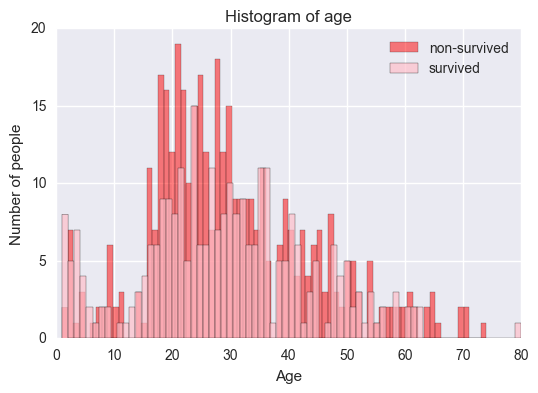

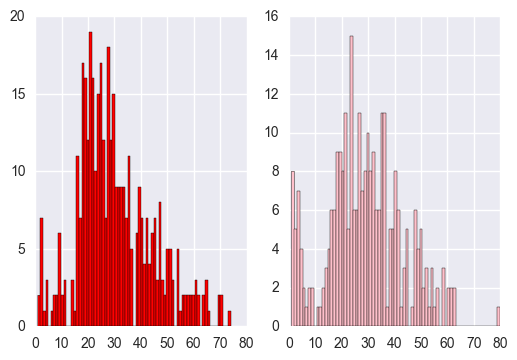

In [30]:
# draw graphs to show age distributions for both survivals and non-survivals

%matplotlib inline
plt.hist(x1, bins=75, alpha=0.5, color= 'r', label = 'non-survived')
plt.hist(x, bins=75, alpha=0.7, color= 'pink', label = 'survived')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Histogram of age')
plt.legend()

fig, axs = plt.subplots(1,2)
axs[0].hist(x1, bins=75, color= 'r')
axs[1].hist(x, bins=75, color= 'pink')


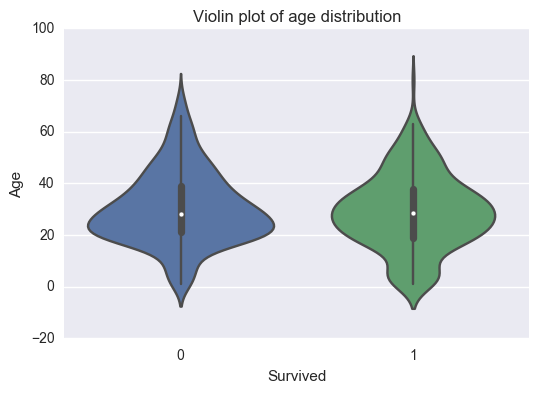

In [60]:
#violin plot

g = sns.violinplot( x=titanic_df["Survived"], y=titanic_df["Age"])
sns.plt.title('Violin plot of age distribution')

In [31]:
# Mann-Whitney U test to compare age distribution of survival vs non-survival

print(stats.mannwhitneyu(x, x1))
print('pvalue = .245 (less than .05). So it is true that there is no signficant difference.')

MannwhitneyuResult(statistic=55611.5, pvalue=0.24472631117511934)
pvalue = .245 (less than .05). So it is true that there is no signficant difference.


### Answer 2. Age doesn't affect the survival rate.
Although there seems to be difference in survival rate for those below 10 years old according to the violin plot, I don't investigate further here. To reveal what made differnce for those below 10 years old, we need more information.

## 3. Question 3

At this section, I would try to answer the last question;"was there any correlation between fare and survival rate?".

In [63]:
# devide given data into two: those survived(x) and those non-survived(x1)
# describe the median, 25%, 75%, mean and etc. for each group

df_Survived = titanic_df[titanic_df.Survived==1]
x2 = df_Survived['Fare'].dropna()
print('Stats for fare for survivals')
print(x2.describe())
print('\n')

df_xSurvived = titanic_df[titanic_df.Survived==0]
x3 = df_xSurvived['Fare'].dropna()
print('Stats for fare for non-survivals')
print(x3.describe())

Stats for fare for survivals
count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64


Stats for fare for non-survivals
count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64


(array([   1.,  107.,   36.,   51.,   24.,   10.,    2.,   13.,   16.,
           4.,    4.,   18.,    8.,    9.,    0.,    2.,    5.,    4.,
           0.,    6.,    0.,    2.,    4.,    0.,    2.,    0.,    0.,
           0.,    0.,    0.,    3.,    0.,    0.,    3.,    0.,    0.,
           1.,    0.,    4.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    3.]),
 array([   0.      ,    6.831056,   13.662112,   20.493168,   27.324224,
          34.15528 ,   40.986336,   47.817392,   54.648448,   61.479504,
          68.31056 ,   75.141616,   81.972672,   88.803728,   95.634784,
         102.46584 ,  109.296896,  116.127952,  122.959008,  129.790064,
         136.62112 ,  143.452176,  150.283232,  157.114288,  163.945344,
         170.7764  ,  177.607456,  1

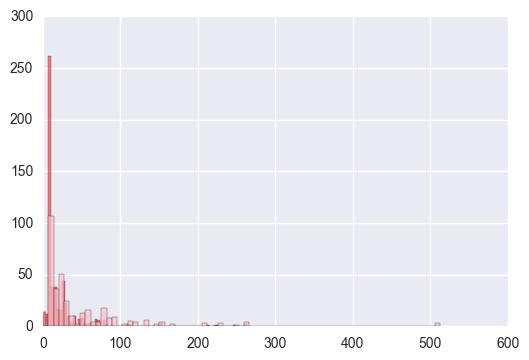

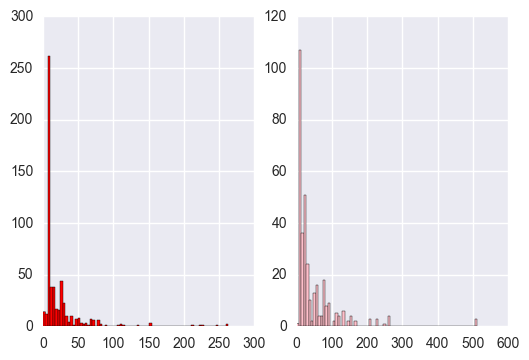

In [65]:
# draw graphs to show fare distributions for both survivals and non-survivals

%matplotlib inline
plt.hist(x3, bins=75, alpha=0.5, color= 'r')
plt.hist(x2, bins=75, alpha=0.7, color= 'pink')

fig, axs = plt.subplots(1,2)
axs[0].hist(x3, bins=75, color= 'r')
axs[1].hist(x2, bins=75, color= 'pink')

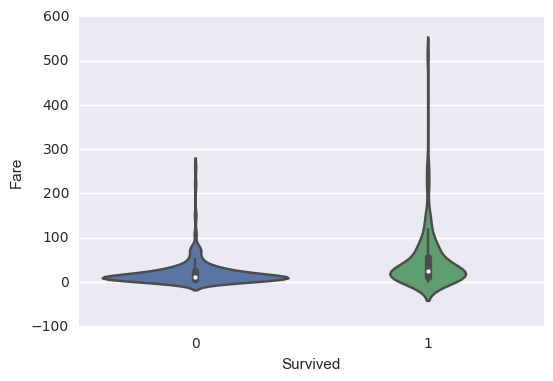

In [68]:
#violin plot
sns.violinplot( x=titanic_df["Survived"], y=titanic_df["Fare"])

In [46]:
# Mann-Whitney U test to compare fare distribution of survival vs non-survival
print(stats.mannwhitneyu(x2, x3))
print('pvalue = 2.277 (more than .05). So it is true that there is signficant difference.')

MannwhitneyuResult(statistic=57806.5, pvalue=2.2767385896251186e-22)
pvalue = 2.277 (more than .05). So it is true that there is signficant difference.


### Answer 3. Fare affects the survival rate.

## 3. Conclusion

### - Finding 1. There might be a positive correlation between survived and gender.

### - Finding 2. Age doesn't matter to survive or not.

### - Finding 3. There might be a negative correlation between for fare.

### Conclusion: According to the data, chances to survive were higher for passengers who is female and paid higher fare. 